The most important building block of a CNN is the convolutional layer. Neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields. In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.

This architeture allow the network to concentrate on small low-level features in thje first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

Implementing Convolutional Layers with Keras:


In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height = 70, width = 120)(images)
images = tf.keras.layers.Rescaling(scale = 1 / 255)(images)



In [2]:
images.shape

TensorShape([2, 70, 120, 3])

Each pixels holds one value per color, and there are three of them (Red, Green, Blue). This explain the forth dimension.

In [3]:
import matplotlib.pyplot as plt

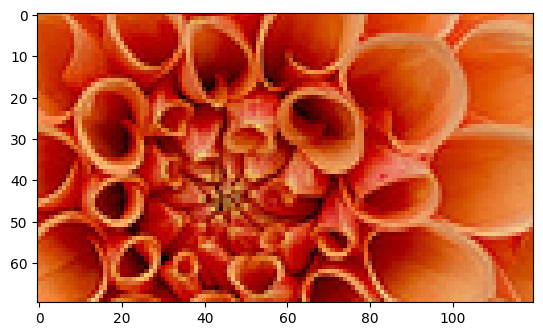

In [4]:
plt.imshow(images[1])

Applying a 2D convolutional layer:

In [5]:
conv_layer = tf.keras.layers.Conv2D(filters = 32, kernel_size = 7)
fmaps = conv_layer(images)

In [6]:
fmaps.shape

TensorShape([2, 64, 114, 32])

We now have each feature intensity over the color, that's why 32.

In [7]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [8]:
biases.shape

(32,)

Implementing Pooling layers with keras:

In [9]:
max_pool = tf.keras.layers.MaxPool2D(pool_size = (2,2))

Max pooling preserves only the strongest features, getting rid of all the meaningless ones, so the next layers gert a cleaner signal to work with.

CNN architecture:

Implementing a basic CNN to tackle the Fasion MNIST dataset introduced in chapter 10

In [10]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3,
                        padding = "same", activation = "relu",kernel_initializer = "he_normal")



In [12]:
model = tf.keras.Sequential([
    DefaultConv2D(filters = 64, kernel_size = (7,7), input_shape = [28,28,1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 128),
    DefaultConv2D(filters = 128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 128),
    DefaultConv2D(filters = 128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 64, activation = "relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 10, activation = "softmax")

])

c:\Users\Welder\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
